In [2]:
import seaborn as sns  # Imports Seaborn library for advanced statistical visualizations
%matplotlib inline
# Displays plots directly inside Jupyter Notebook output cells


In [3]:
tips = sns.load_dataset('tips')  # Loads the built-in "tips" dataset from Seaborn into a DataFrame


In [4]:
tips.head()  # Displays the first 5 rows of the tips dataset


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/tmp/ipython-input-2019912720.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'])  # Plots the distribution (histogram + density curve) of the total_bill column


<Axes: xlabel='total_bill', ylabel='Density'>

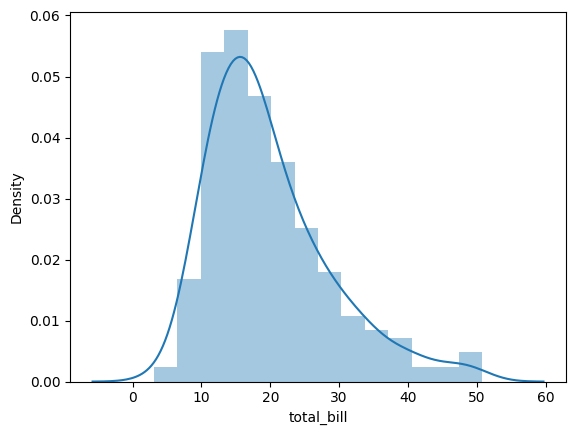

In [5]:
sns.distplot(tips['total_bill'])  # Plots the distribution (histogram + density curve) of the total_bill column
# Safe to ignore warnings


/tmp/ipython-input-2868374249.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'], kde=False, bins=30)


<Axes: xlabel='total_bill'>

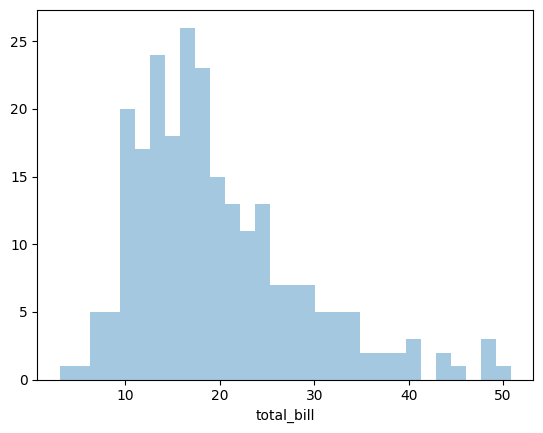

In [6]:
sns.distplot(tips['total_bill'], kde=False, bins=30)
# Plots only a histogram (no density curve) of total_bill with 30 bins


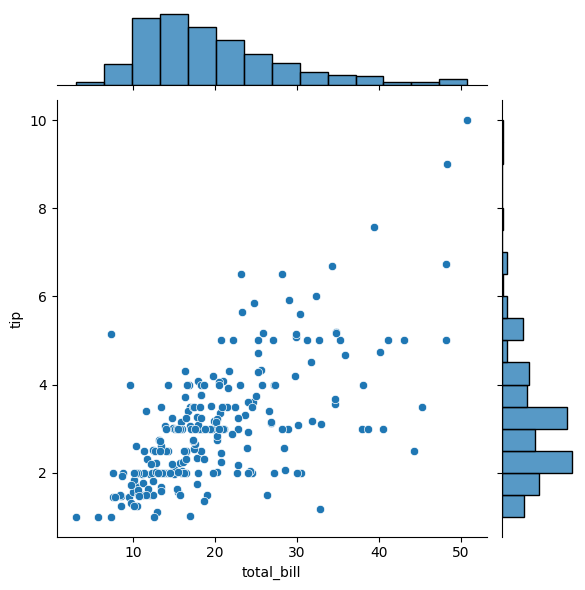

In [7]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter')
# Creates a scatter plot showing relationship between total_bill and tip with marginal distributions


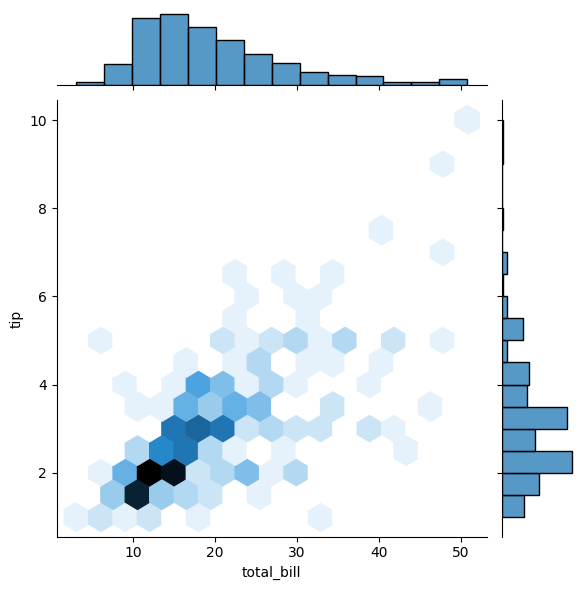

In [8]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
# Creates a hexbin plot showing density of total_bill vs tip with hexagonal bins


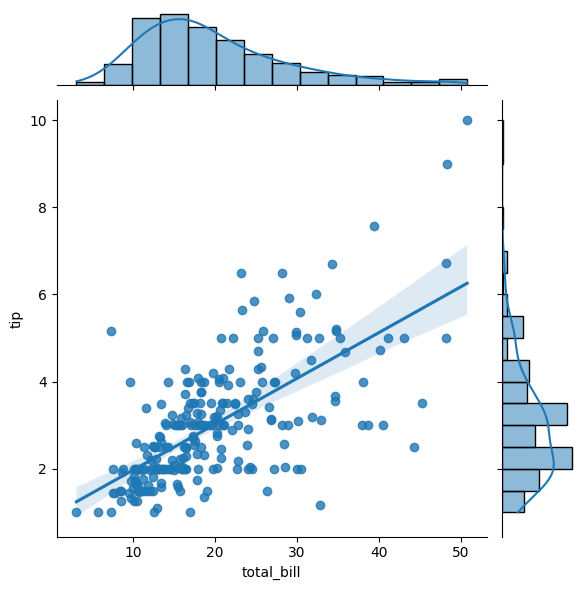

In [9]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')
# Creates a scatter plot with a regression line showing relationship between total_bill and tip


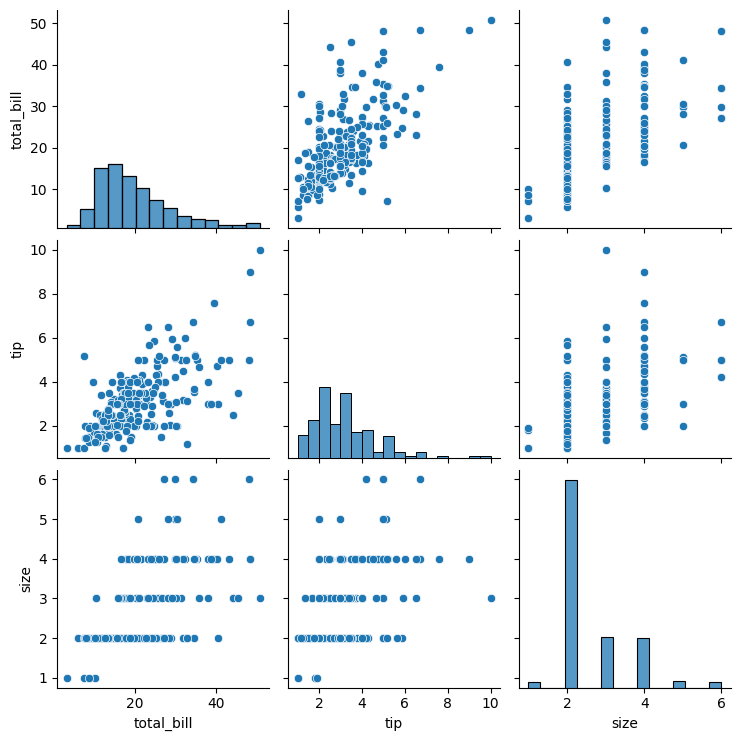

In [10]:
sns.pairplot(tips)  # Creates pairwise scatter plots for all numerical columns with histograms on the diagonal


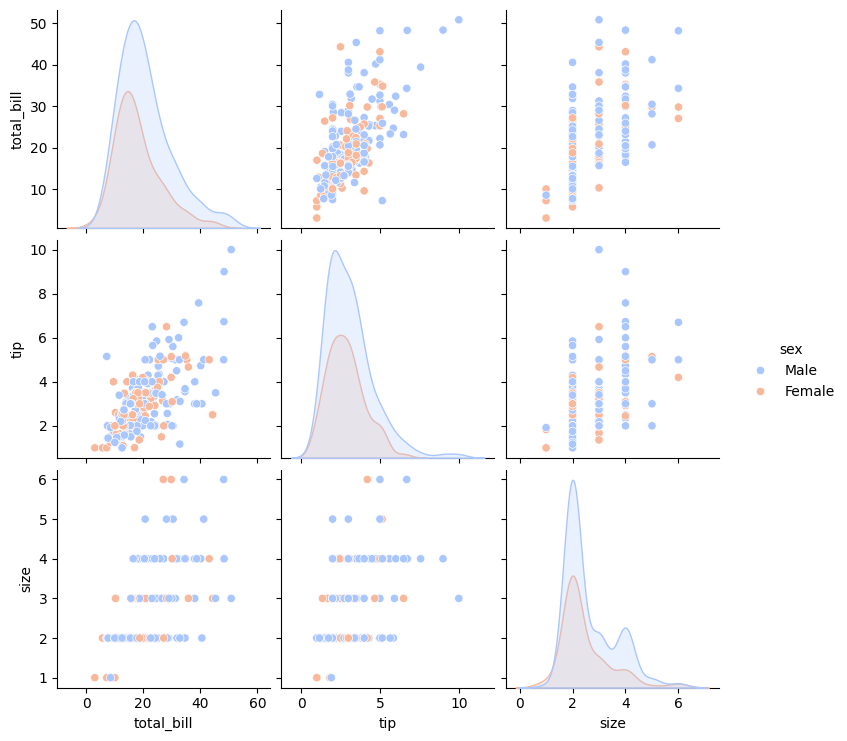

In [11]:
sns.pairplot(tips, hue='sex', palette='coolwarm')
# Creates pairwise plots colored by sex using the coolwarm color palette


<Axes: xlabel='total_bill'>

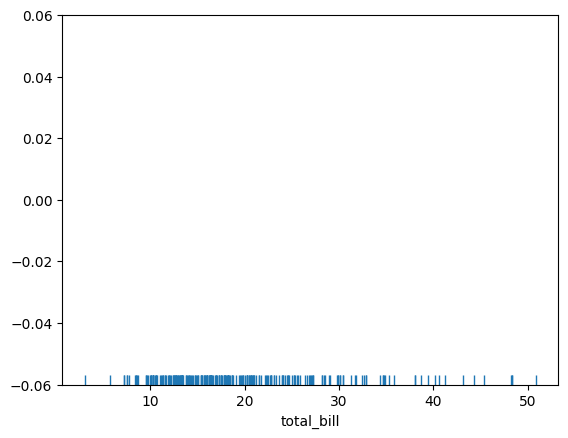

In [12]:
sns.rugplot(tips['total_bill'])
# Draws small vertical ticks to show individual data points distribution


(0.0, 1.0)

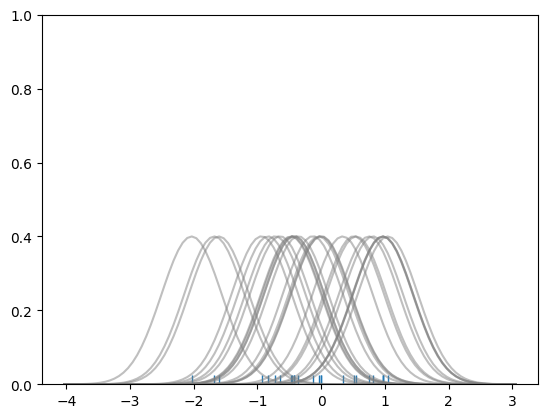

In [13]:
import numpy as np  # Imports NumPy for numerical operations
import matplotlib.pyplot as plt  # Imports Matplotlib for plotting
from scipy import stats  # Imports statistical functions (for normal distribution)

# Create dataset
dataset = np.random.randn(25)
# Generates 25 random values from a standard normal distribution

sns.rugplot(dataset);
# Displays rugplot to show individual data points on x-axis

# Set up the x-axis for the plot
x_min = dataset.min() - 2  # Minimum x value (with padding)
x_max = dataset.max() + 2  # Maximum x value (with padding)

x_axis = np.linspace(x_min, x_max, 100)
# Creates 100 evenly spaced points between x_min and x_max

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2
# Calculates optimal bandwidth for kernel density estimation

kernel_list = []
# Initializes empty list to store kernel curves

for data_point in dataset:  # Loops through each data value

    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    # Creates normal distribution (kernel) centered at data_point

    kernel_list.append(kernel)
    # Stores kernel curve in list

    kernel = kernel / kernel.max()
    # Normalizes kernel to maximum value of 1

    kernel = kernel * .4
    # Scales kernel height for visualization

    plt.plot(x_axis, kernel, color='grey', alpha=0.5)
    # Plots each kernel curve in semi-transparent grey

plt.ylim(0,1)
# Sets y-axis limits from 0 to 1


Text(0.5, 0.98, 'Sum of the Basis Functions')

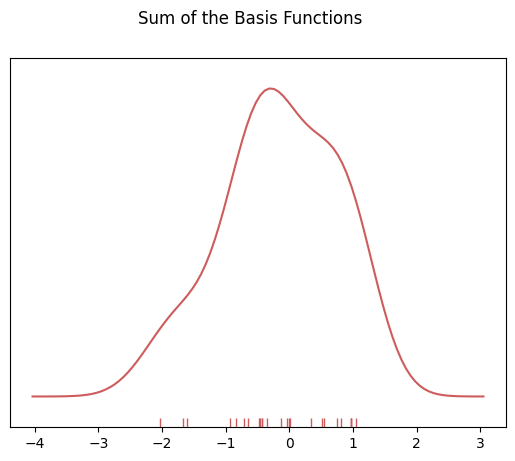

In [14]:
# To get the kde plot we can sum these basis functions.

sum_of_kde = np.sum(kernel_list, axis=0)
# Sums all kernel curves point-wise to form the KDE curve

fig = plt.plot(x_axis, sum_of_kde, color='indianred')
# Plots the combined KDE curve in indian red color

sns.rugplot(dataset, c='indianred')
# Adds rugplot of original data points in same color

plt.yticks([])
# Removes y-axis tick marks

plt.suptitle("Sum of the Basis Functions")
# Sets overall figure title


<Axes: xlabel='total_bill', ylabel='Density'>

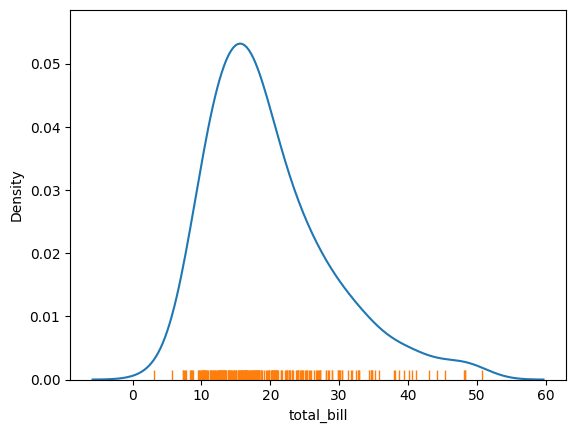

In [15]:
sns.kdeplot(tips['total_bill'])  # Plots the kernel density estimation (smooth distribution curve) of total_bill
sns.rugplot(tips['total_bill'])  # Adds small ticks to show individual data points along the x-axis


<Axes: xlabel='tip', ylabel='Density'>

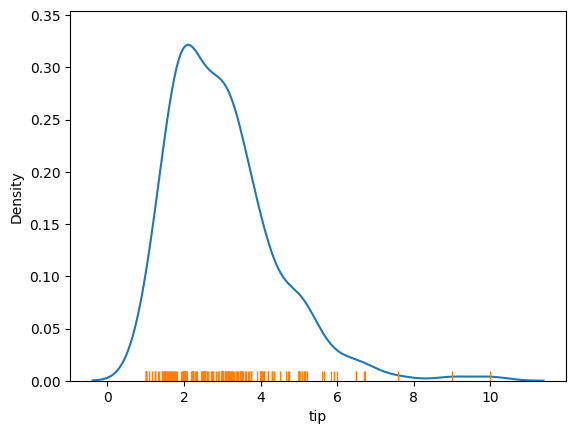

In [16]:
sns.kdeplot(tips['tip'])  # Plots the smooth kernel density curve of the tip column
sns.rugplot(tips['tip'])  # Adds small ticks to show individual tip values along the x-axis


In [17]:
import seaborn as sns
# Imports Seaborn for statistical visualizations

%matplotlib inline
# Displays plots inside Jupyter Notebook cells

tips = sns.load_dataset('tips')
# Loads the built-in tips dataset

tips.head()
# Displays first 5 rows of the dataset


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='sex', ylabel='total_bill'>

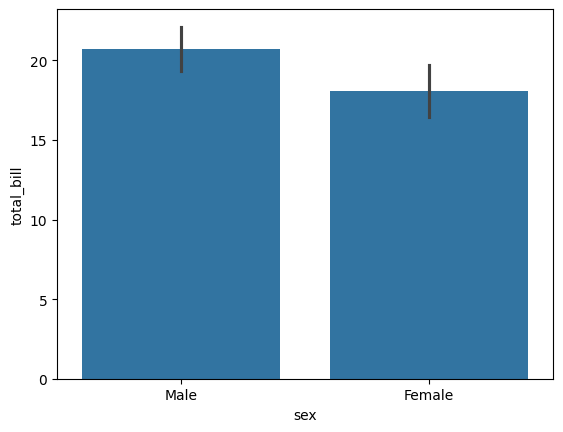

In [18]:
sns.barplot(x='sex', y='total_bill', data=tips)
# Creates a bar plot showing the average total_bill for each sex category


In [19]:
import numpy as np  # Imports NumPy for numerical operations


<Axes: xlabel='sex', ylabel='total_bill'>

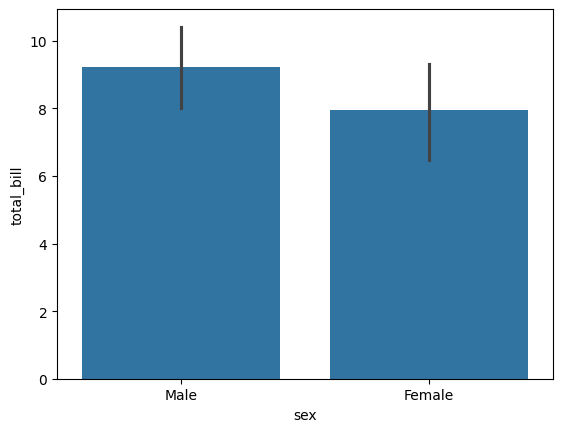

In [20]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)
# Creates a bar plot showing the standard deviation of total_bill for each sex


<Axes: xlabel='sex', ylabel='count'>

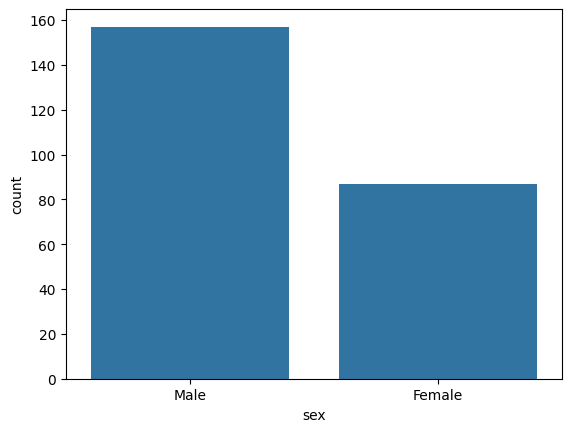

In [21]:
sns.countplot(x='sex', data=tips)
# Creates a count plot showing the number of occurrences for each sex category


/tmp/ipython-input-4086090773.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="day", y="total_bill", data=tips, palette='rainbow')


<Axes: xlabel='day', ylabel='total_bill'>

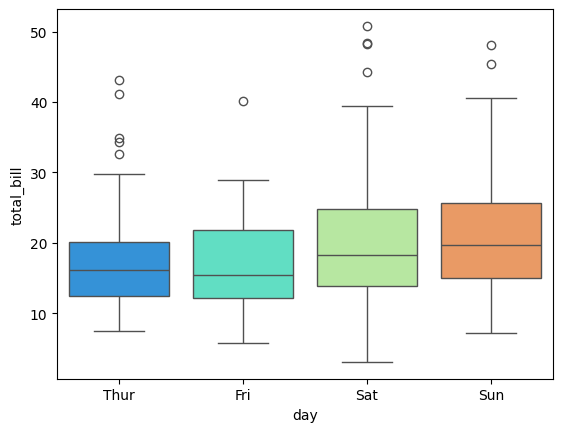

In [22]:
sns.boxplot(x="day", y="total_bill", data=tips, palette='rainbow')
# Creates a boxplot of total_bill grouped by day with rainbow colors


/tmp/ipython-input-4086090773.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="day", y="total_bill", data=tips, palette='rainbow')


<Axes: xlabel='day', ylabel='total_bill'>

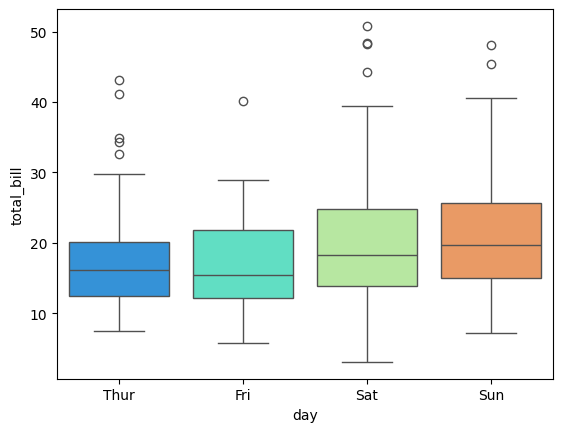

In [23]:
sns.boxplot(x="day", y="total_bill", data=tips, palette='rainbow')
# Creates a boxplot of total_bill grouped by day with rainbow colors


<Axes: xlabel='day', ylabel='total_bill'>

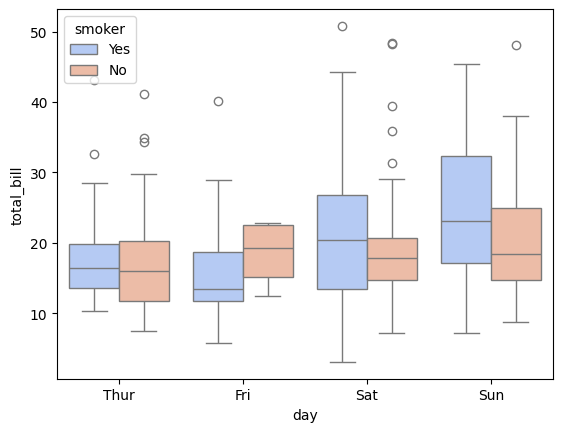

In [24]:
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="coolwarm")
# Creates boxplots grouped by day and split by smoker category using color hue


/tmp/ipython-input-752780446.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="day", y="total_bill", data=tips, palette='rainbow')


<Axes: xlabel='day', ylabel='total_bill'>

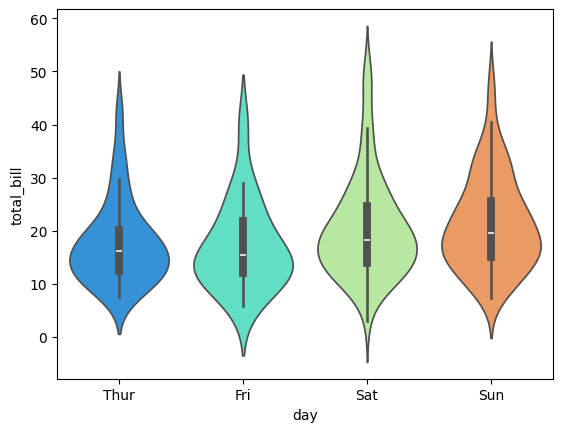

In [25]:
sns.violinplot(x="day", y="total_bill", data=tips, palette='rainbow')
# Creates a violin plot showing distribution of total_bill for each day

<Axes: xlabel='day', ylabel='total_bill'>

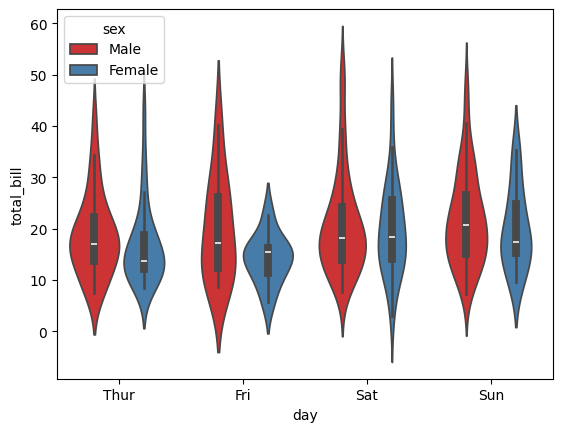

In [26]:
sns.violinplot(x="day", y="total_bill", data=tips, hue='sex', palette='Set1')
# Creates violin plots grouped by day and separated by sex using color hue

<Axes: xlabel='day', ylabel='total_bill'>

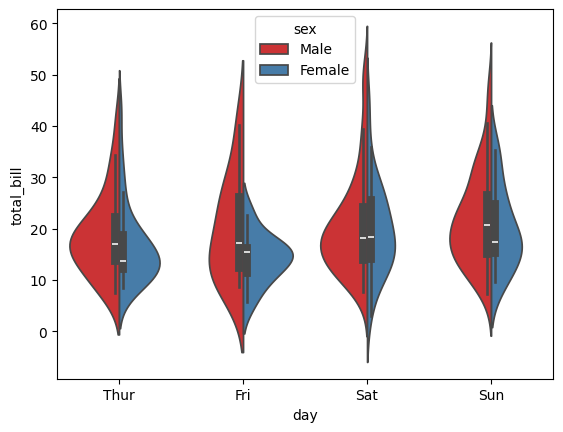

In [27]:

sns.violinplot(x="day", y="total_bill", data=tips, hue='sex', split=True, palette='Set1')
# Splits each violin into two halves to compare male vs female distributions per day

/tmp/ipython-input-2241403177.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="day", y="total_bill", data=tips, palette='rainbow')


<Axes: xlabel='day', ylabel='total_bill'>

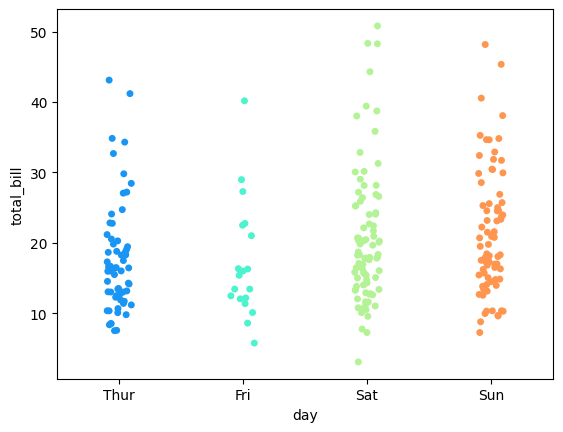

In [28]:
sns.stripplot(x="day", y="total_bill", data=tips, palette='rainbow')
# Creates a strip plot showing individual total_bill points grouped by day


/tmp/ipython-input-588727102.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, palette='rainbow')


<Axes: xlabel='day', ylabel='total_bill'>

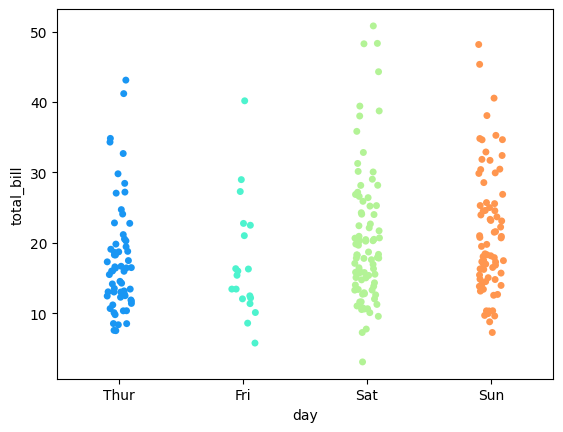

In [29]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, palette='rainbow')
# Adds jitter to spread points horizontally to reduce overlap


<Axes: xlabel='day', ylabel='total_bill'>

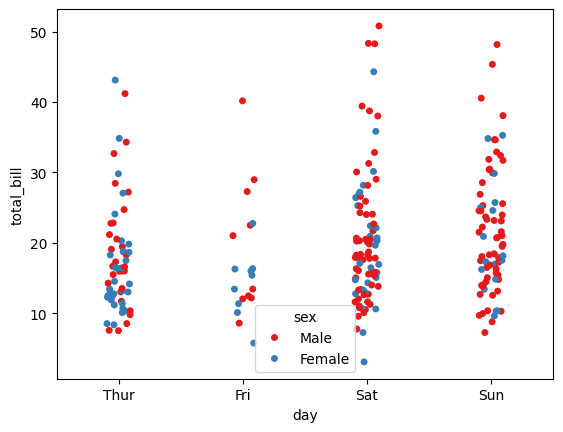

In [30]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, hue='sex', palette='Set1')
# Colors points by sex category while keeping jitter


<Axes: xlabel='day', ylabel='total_bill'>

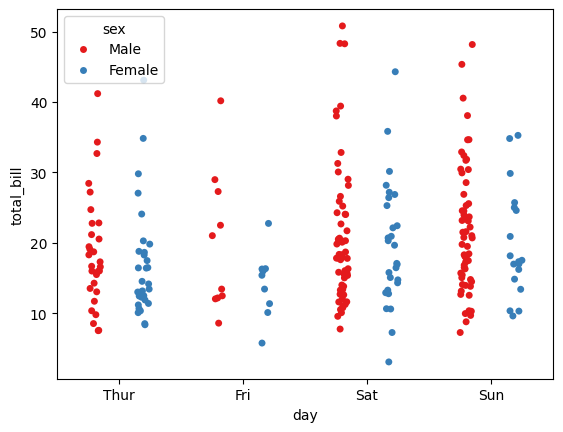

In [31]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, hue='sex', palette='Set1', dodge=True)
# Separates (dodges) male and female points within each day category


<Axes: xlabel='day', ylabel='total_bill'>

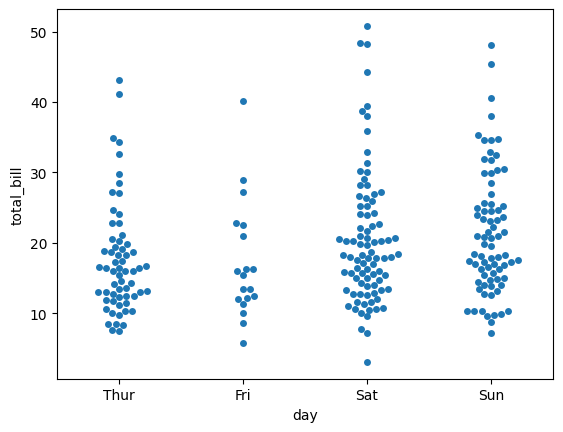

In [32]:
sns.swarmplot(x="day", y="total_bill", data=tips)
# Creates a swarm plot where points are arranged to avoid overlap automatically


/tmp/ipython-input-2622253494.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="tip", y="day", data=tips, palette='rainbow')


<Axes: xlabel='tip', ylabel='day'>

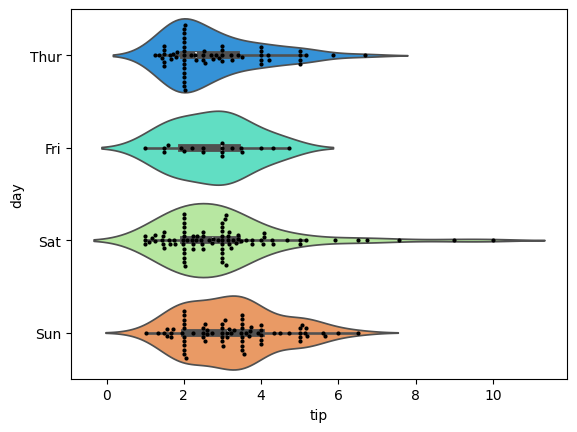

In [33]:
sns.violinplot(x="tip", y="day", data=tips, palette='rainbow')
# Creates a horizontal violin plot showing tip distribution for each day

sns.swarmplot(x="tip", y="day", data=tips, color='black', size=3)
# Overlays individual data points in black with small marker size


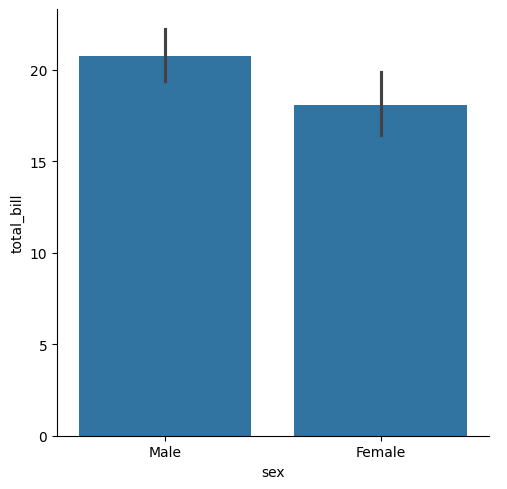

In [34]:
sns.catplot(x='sex', y='total_bill', data=tips, kind='bar')
# Creates a categorical bar plot showing the average total_bill for each sex


In [35]:
import seaborn as sns
%matplotlib inline


In [36]:
flights = sns.load_dataset('flights')  # Loads the built-in flights dataset


In [37]:
tips = sns.load_dataset('tips')  # Loads the built-in tips dataset


In [38]:
tips.head()  # Displays first 5 rows of the tips dataset


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [39]:
flights.head()  # Displays first 5 rows of the flights dataset


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [41]:
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [44]:
tips.corr(numeric_only=True)
# Computes correlation matrix for numerical columns in tips dataset


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

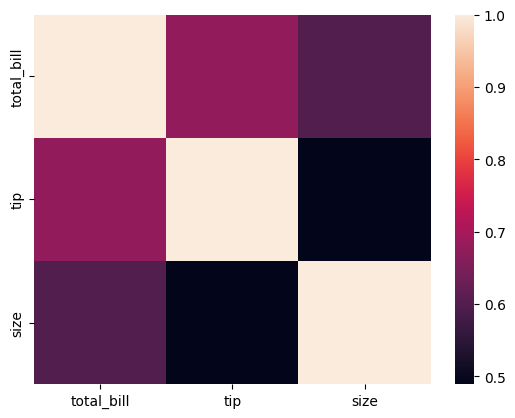

In [45]:
sns.heatmap(tips.corr(numeric_only=True))
# Creates a heatmap visualization of the correlation matrix


<Axes: >

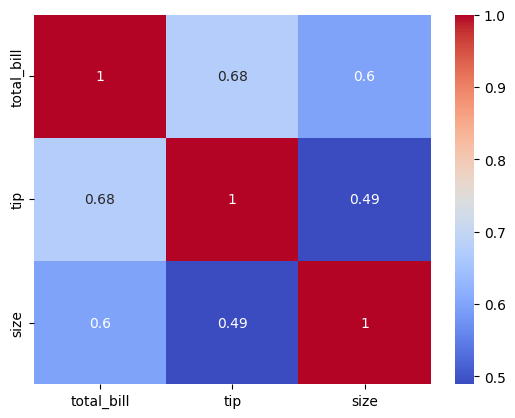

In [46]:
sns.heatmap(tips.corr(numeric_only=True), cmap='coolwarm', annot=True)
# Creates heatmap with coolwarm colors and displays correlation values inside cells


In [47]:
flights.pivot_table(values='passengers', index='month', columns='year')
# Creates a pivot table with months as rows, years as columns, and passenger counts as values

/tmp/ipython-input-2369843371.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights.pivot_table(values='passengers', index='month', columns='year')


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


In [48]:
pvflights = flights.pivot_table(values='passengers', index='month', columns='year')
# Stores the pivot table in a variable for reuse

/tmp/ipython-input-3734600561.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvflights = flights.pivot_table(values='passengers', index='month', columns='year')


<Axes: xlabel='year', ylabel='month'>

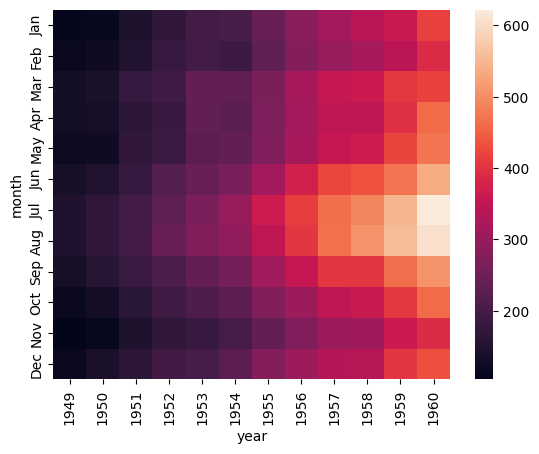

In [49]:
sns.heatmap(pvflights)
# Creates a heatmap to visualize passenger counts across months and years

<Axes: xlabel='year', ylabel='month'>

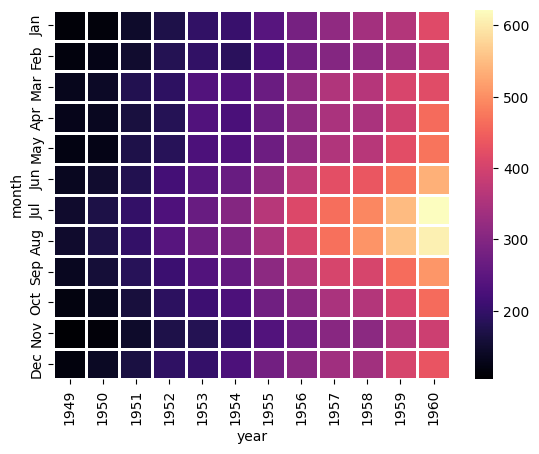

In [50]:
sns.heatmap(pvflights, cmap='magma', linecolor='white', linewidths=1)
# Creates styled heatmap with magma colormap and white grid lines between cells

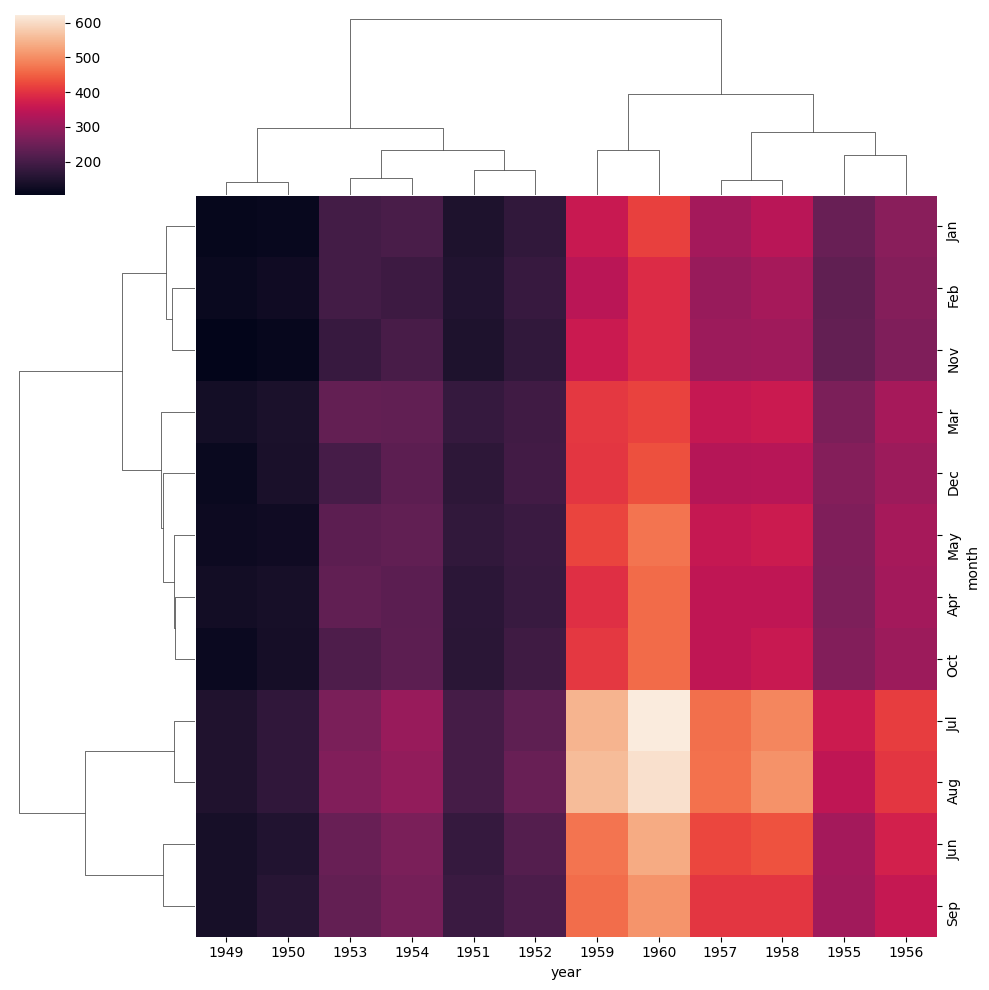

In [51]:
sns.clustermap(pvflights)
# Creates a clustered heatmap grouping months and years by similarity in passenger counts

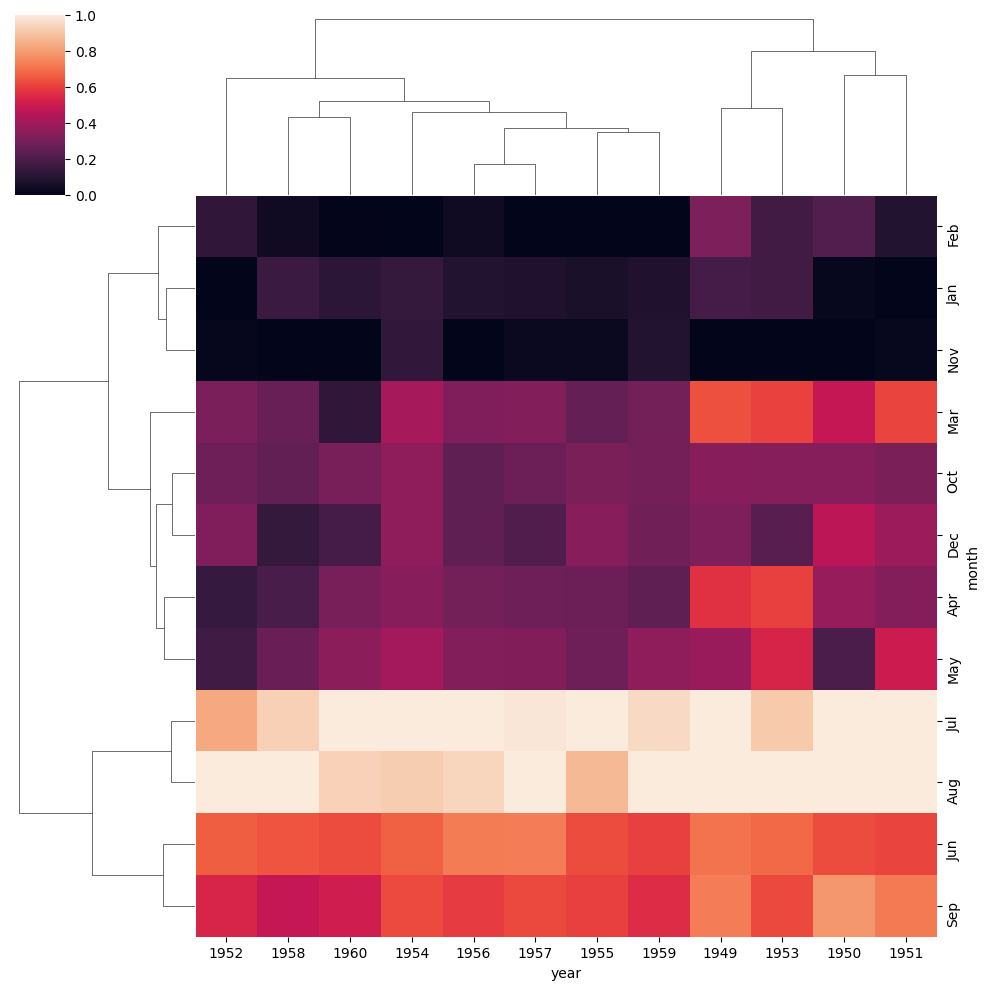

In [52]:
sns.clustermap(pvflights, standard_scale=1)
# Creates clustered heatmap with column-wise normalization (scales each column)


In [53]:
import seaborn as sns
%matplotlib inline


In [55]:
tips = sns.load_dataset('tips')

In [56]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


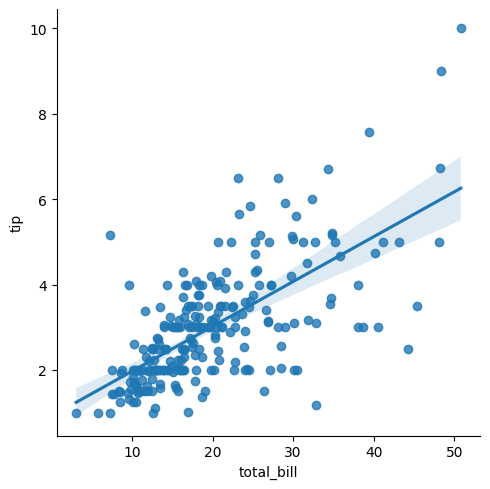

In [57]:
sns.lmplot(x='total_bill', y='tip', data=tips)
# Creates scatter plot with linear regression line for total_bill vs tip

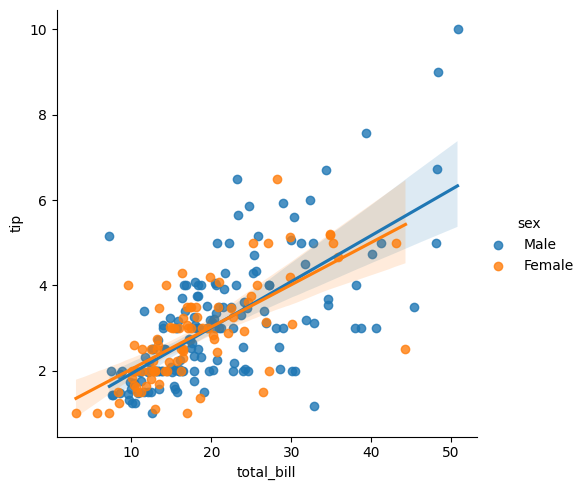

In [58]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex')
# Creates regression plots separated and colored by sex

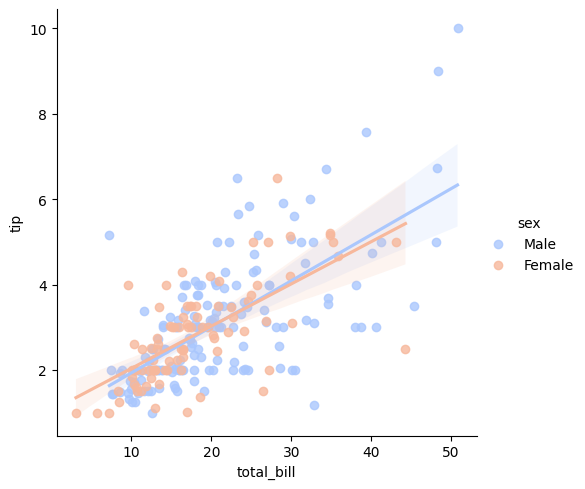

In [59]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', palette='coolwarm')
# Creates regression plots by sex using the coolwarm color palette

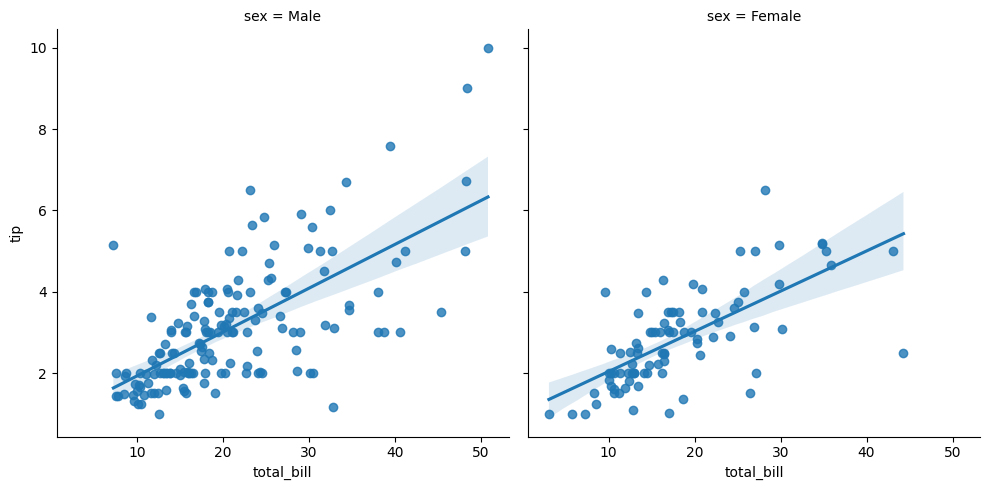

In [60]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex')
# Creates separate regression plots for each sex in different columns

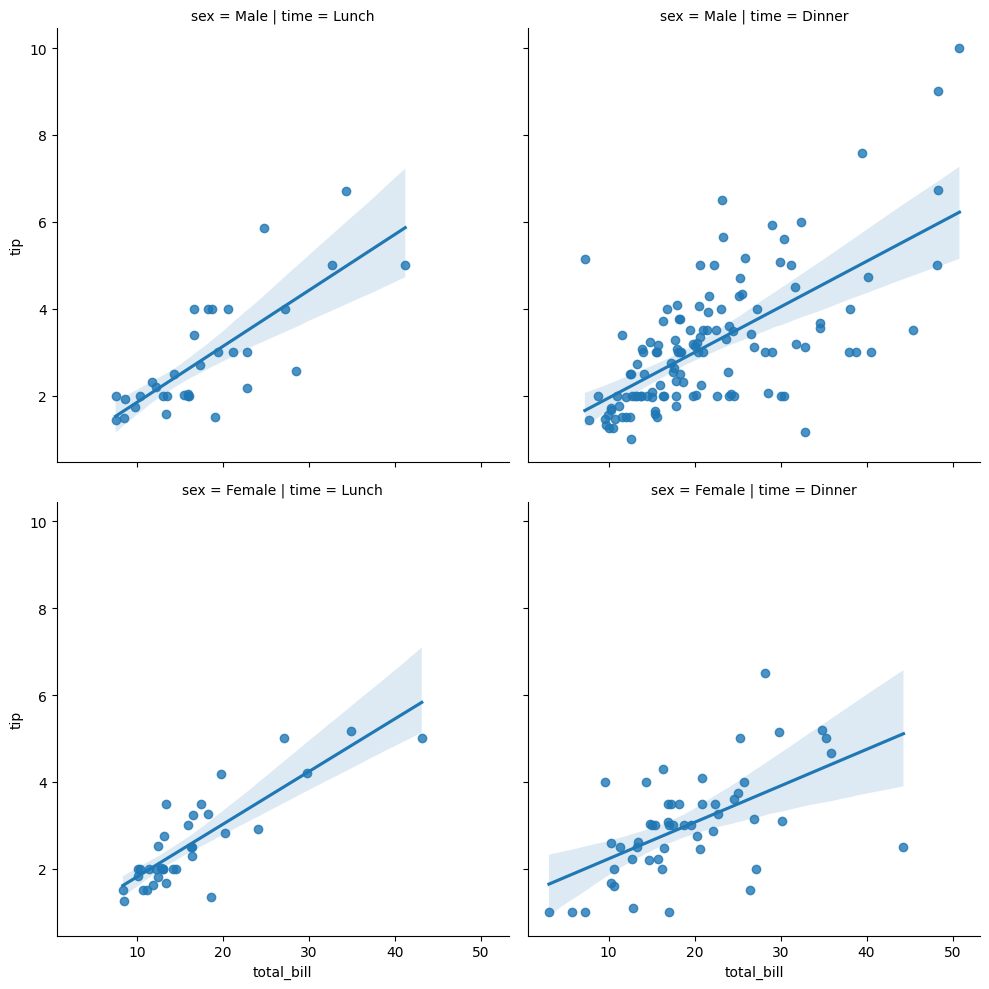

In [61]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time", data=tips)
# Creates a grid of regression plots split by sex (rows) and time (columns)

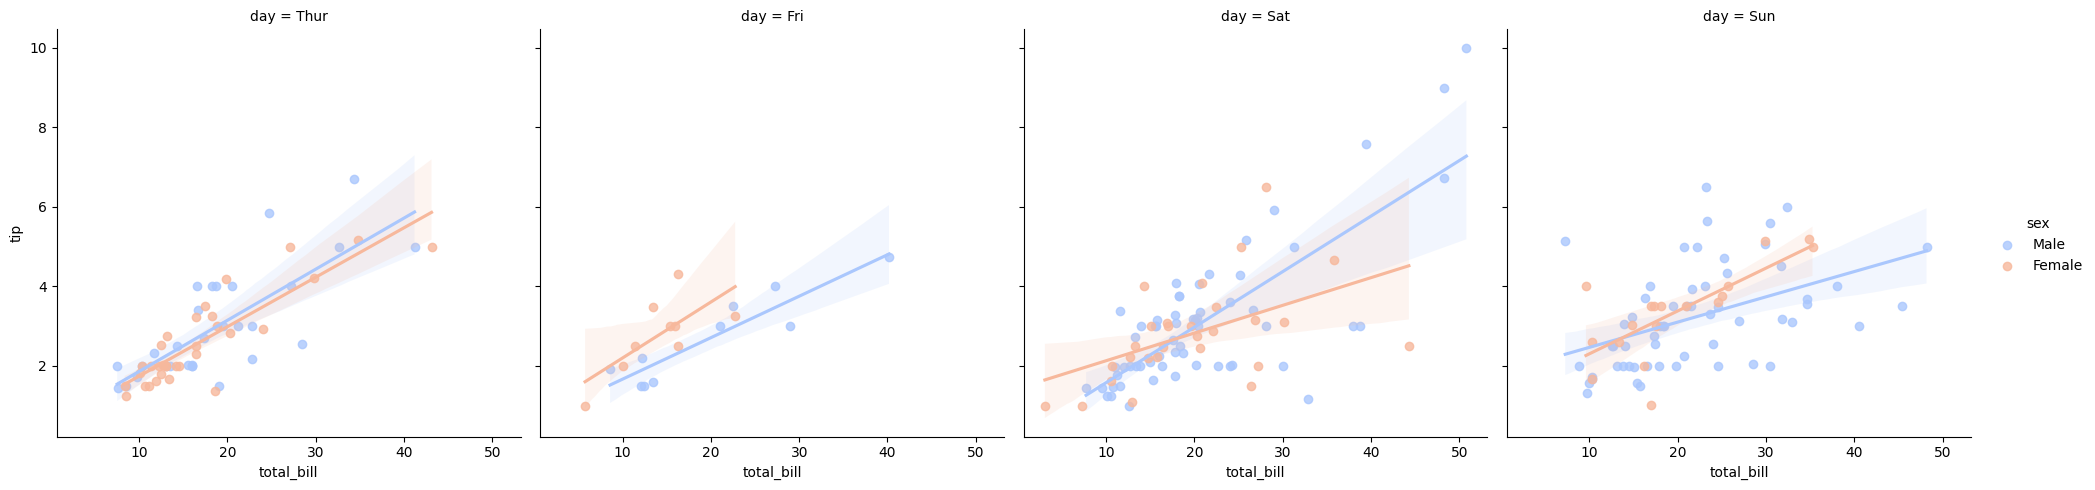

In [62]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='day', hue='sex', palette='coolwarm')
# Creates regression plots for each day with points colored by sex

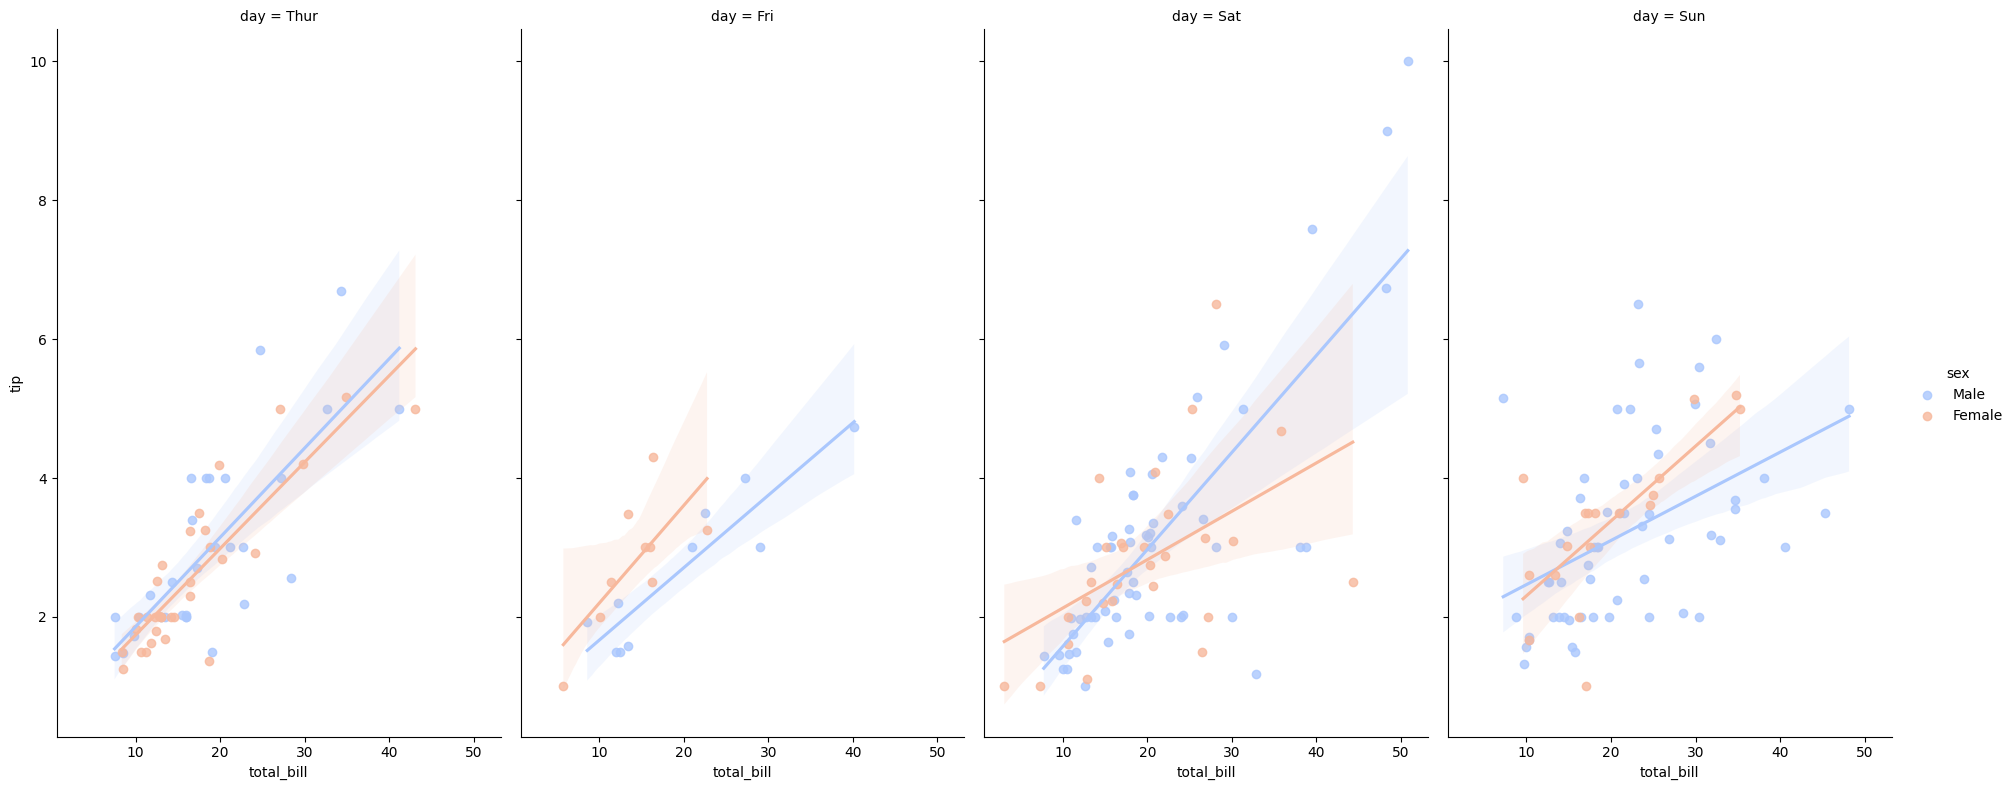

In [63]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='day', hue='sex', palette='coolwarm', aspect=0.6, height=8)
# Creates regression plots for each day, colored by sex, with taller height (8) and adjusted width ratio (aspect)
